In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

hand_written = datasets.load_digits()

In [0]:
print(hand_written.images.shape)

(1797, 8, 8)


In [0]:
print(hand_written.data.shape)

(1797, 64)


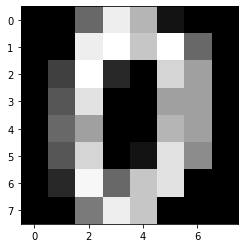

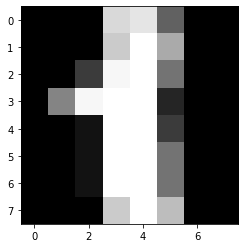

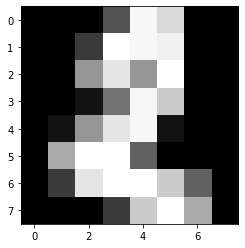

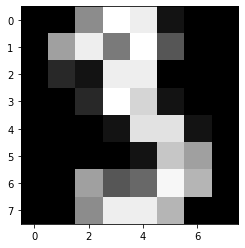

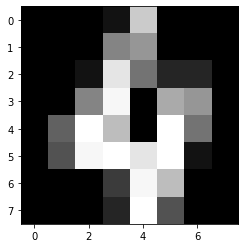

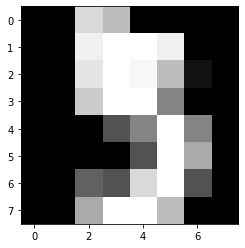

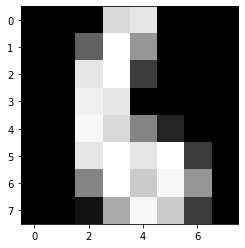

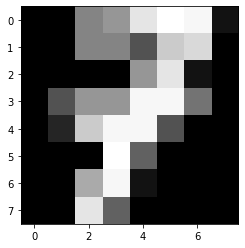

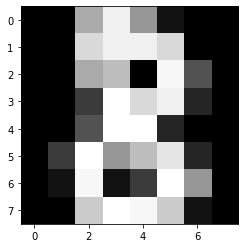

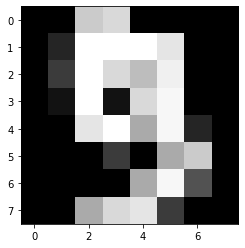

In [0]:
for i in range(10):
    plt.imshow(digits.images[i], cmap=plt.cm.Greys_r)
    plt.show()

In [0]:

# Create feature and target arrays
X = hand_written.data
y = hand_written.target


In [0]:
# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [0]:
print(f'train: {X_train.size}')
print(f'test: {X_test.size}')

train: 80448
test: 34560


In [0]:
# Initialize our classifier
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')

# Fitting the model with the data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')

In [0]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.987037037037037


In [0]:
y_pred = knn.predict(X_test)

In [0]:
from sklearn import metrics
print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))

accuracy of the predictions: 0.987037037037037
blanced accuracy of the predictions: 0.9869671558350802
MCC of the predictions: 0.9856309128788103
Confusion matrix of the predictions: [[64  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 52  0  0  0  1]
 [ 0  1  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 62  0  0]
 [ 0  0  0  0  0  0  0  0 49  0]
 [ 0  1  0  2  1  1  0  0  0 49]]


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


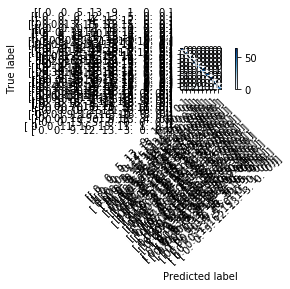

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
 
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes= hand_written['images'], title=None)

plt.show()

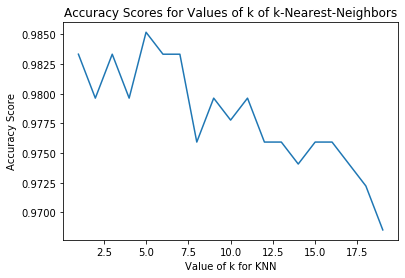

In [0]:
k_range = list(range(1,20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()  